In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
Train_data=pd.read_excel("Final_Train.xlsx")
Test_data=pd.read_excel("Final_Test.xlsx")
SD=pd.read_excel("Sample_submission.xlsx")


In [4]:
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
Test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
SD.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


In [7]:
Train_data.shape

(5961, 7)

In [8]:
Test_data.shape

(1987, 6)

In [9]:
SD.shape

(1987, 1)

In [10]:
Train_data.isnull().values.any()

True

In [11]:
Train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

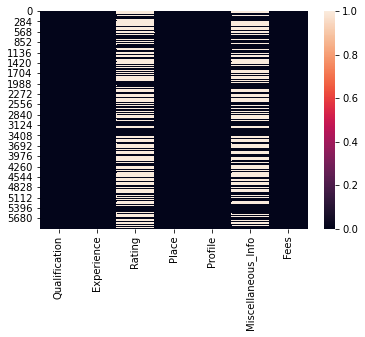

In [12]:
sn.heatmap(Train_data.isnull())
plt.show()

In [13]:
Train_data.dropna(inplace=True)

In [14]:
Train_data.isnull().values.any()

False

In [15]:
Train_data.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [16]:
Train_data.shape

(2577, 7)

In [17]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       2577 non-null   object
 1   Experience          2577 non-null   object
 2   Rating              2577 non-null   object
 3   Place               2577 non-null   object
 4   Profile             2577 non-null   object
 5   Miscellaneous_Info  2577 non-null   object
 6   Fees                2577 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 161.1+ KB


In [18]:
Train_data.describe()

,Fees
count,2577.000000
mean,343.440047
std,192.680230
min,50.000000
25%,200.000000
50%,300.000000
75%,500.000000
max,950.000000


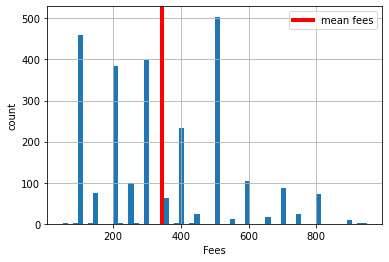

In [19]:
Fees=Train_data['Fees'].hist(bins=60)
mean_val=np.mean(Train_data['Fees'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

In [20]:
Train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [21]:
Train_data['Experience'].unique()

array(['24 years experience', '12 years experience',
       '20 years experience', '10 years experience', '9 years experience',
       '19 years experience', '21 years experience',
       '25 years experience', '15 years experience', '7 years experience',
       '14 years experience', '23 years experience',
       '31 years experience', '8 years experience', '22 years experience',
       '16 years experience', '11 years experience',
       '38 years experience', '6 years experience', '36 years experience',
       '13 years experience', '41 years experience',
       '40 years experience', '30 years experience',
       '26 years experience', '5 years experience', '34 years experience',
       '39 years experience', '35 years experience',
       '18 years experience', '17 years experience',
       '28 years experience', '27 years experience',
       '58 years experience', '46 years experience',
       '33 years experience', '44 years experience', '4 years experience',
       '29 years exp

In [22]:
Train_datacor=Train_data.corr()
Train_datacor

,Fees
Fees,1.0


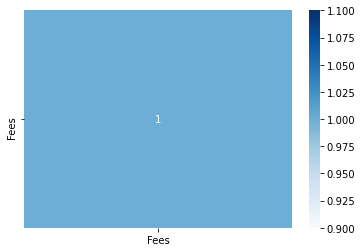

In [23]:
sn.heatmap(Train_datacor,cmap='Blues',annot=True)

In [24]:
Train_data.Place.value_counts()

HSR Layout, Bangalore            45
Dwarka, Delhi                    37
Banjara Hills, Hyderabad         33
Indiranagar, Bangalore           32
Whitefield, Bangalore            30
                                 ..
Raja Annamalai Puram, Chennai     1
Piravom, Ernakulam                1
Versova, Mumbai                   1
Hebbal Kempapura, Bangalore       1
Perambur, Chennai                 1
Name: Place, Length: 561, dtype: int64

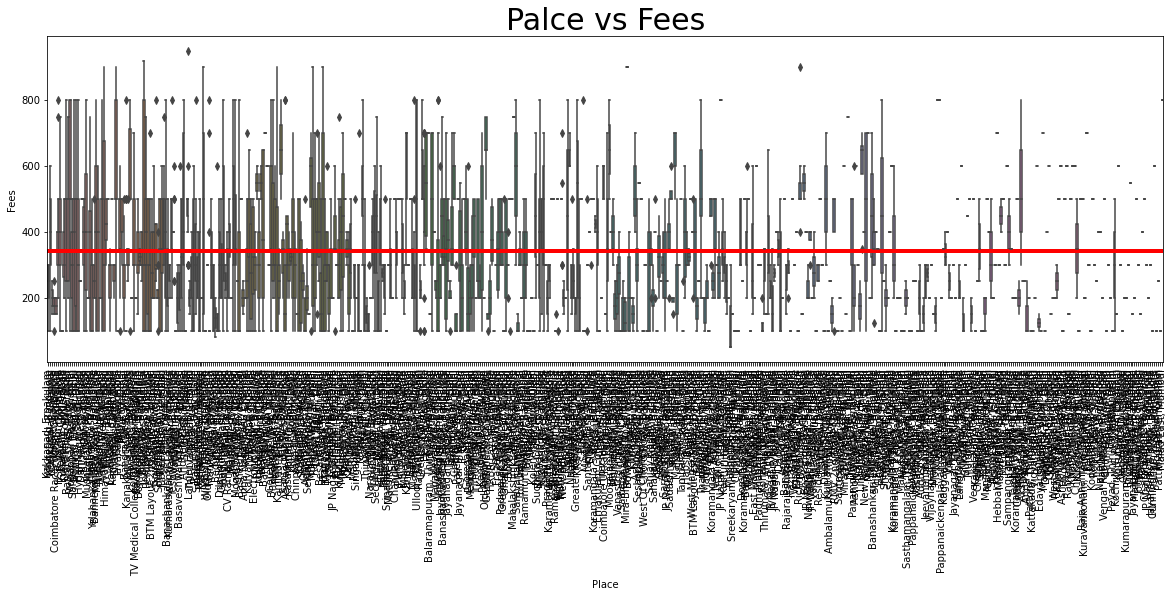

In [25]:
plt.figure(figsize=(20,6))
mean_fees=np.mean(Train_data['Fees'])
sn.boxplot(y='Fees',x='Place',data=Train_data)
plt.axhline(mean_fees,linewidth=4,color='red',label='mean fees')
plt.title("Palce vs Fees",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

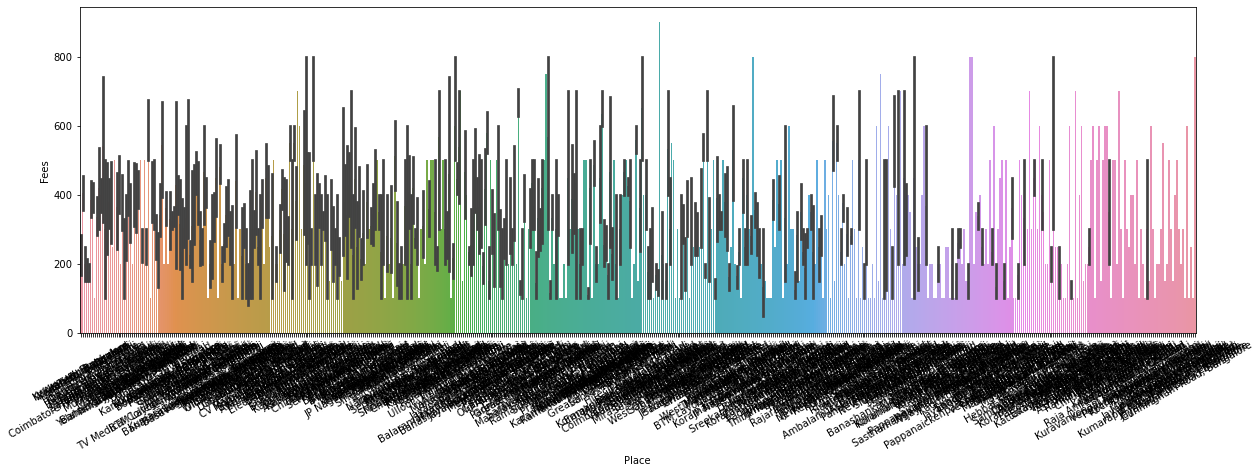

In [26]:
plt.figure(figsize=(20,6))
sn.barplot(y='Fees',x='Place',data=Train_data)
plt.xticks(rotation=30)
plt.show()

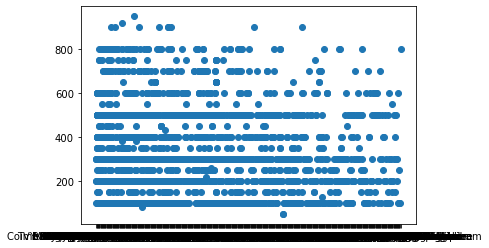

In [27]:
plt.scatter(Train_data['Place'],Train_data['Fees'])

In [28]:
Train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [29]:
Train_data.Experience.value_counts()

9 years experience     170
12 years experience    162
10 years experience    147
11 years experience    137
19 years experience    135
14 years experience    131
13 years experience    127
15 years experience    108
8 years experience     104
18 years experience    100
7 years experience     100
17 years experience     96
16 years experience     94
21 years experience     87
22 years experience     74
20 years experience     74
6 years experience      67
5 years experience      62
23 years experience     61
24 years experience     46
28 years experience     40
25 years experience     38
27 years experience     35
29 years experience     29
26 years experience     27
37 years experience     24
38 years experience     24
31 years experience     23
32 years experience     23
33 years experience     22
34 years experience     22
30 years experience     21
4 years experience      17
40 years experience     16
35 years experience     16
36 years experience     14
3 years experience      12
4

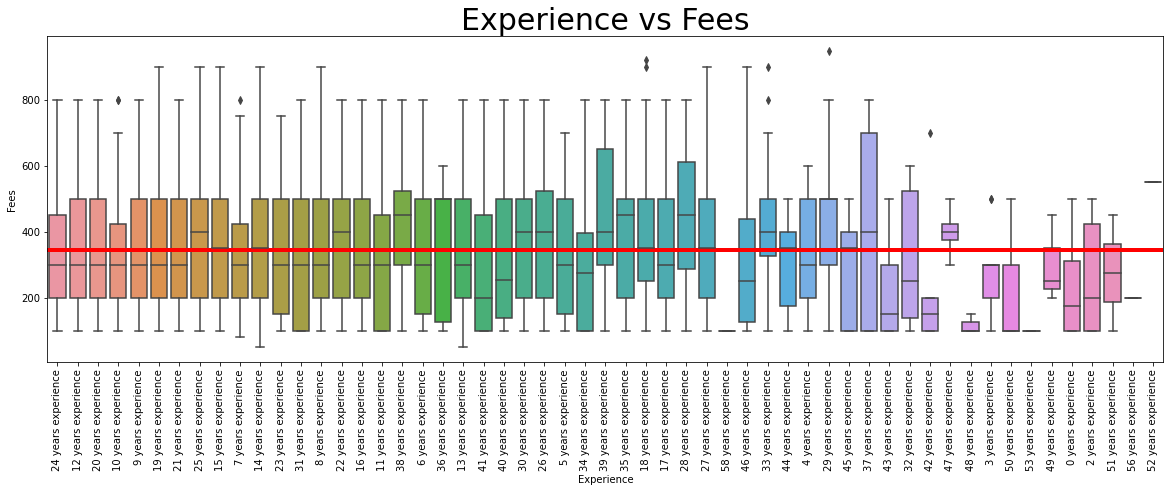

In [30]:
plt.figure(figsize=(20,6))
mean_fees=np.mean(Train_data['Fees'])
sn.boxplot(y='Fees',x='Experience',data=Train_data)
plt.axhline(mean_fees,linewidth=4,color='red',label='mean fees')
plt.title("Experience vs Fees",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

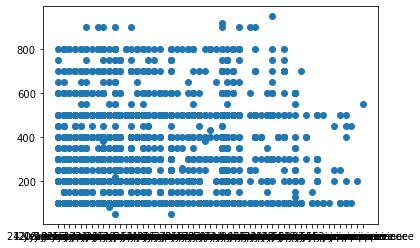

In [31]:
plt.scatter(Train_data['Experience'],Train_data['Fees'])

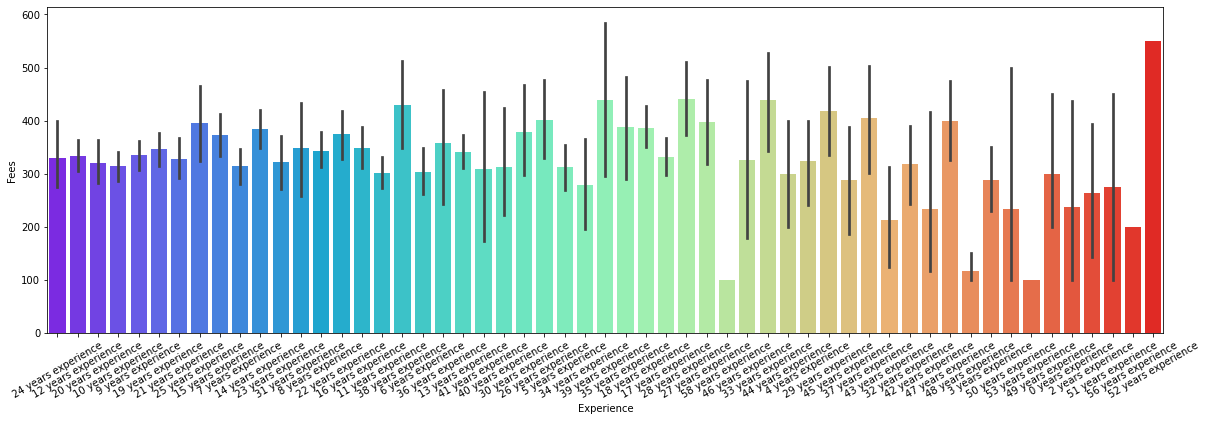

In [32]:
plt.figure(figsize=(20,6))
sn.barplot(y='Fees',x='Experience',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

In [33]:
Train_data.Qualification.value_counts()

BDS                                                                                                   240
MBBS, MD - Dermatology                                                                                117
BHMS                                                                                                  110
MBBS, MS - ENT                                                                                         97
MBBS, MD - Dermatology , Venereology & Leprosy                                                         76
                                                                                                     ... 
Diploma in Dermatology, MBBS                                                                            1
MBBS, MD - Dermatology , Venereology & Leprosy, FRGUHS, Fellowship in Dermatological Laser Surgery      1
MD - Dermatology, MBBS, DNB, FRGUHS                                                                     1
MBBS, Diploma in Otorhinolaryngology (DLO), MS

In [36]:
Train_data.Profile.value_counts()

Dentist             862
Dermatologists      628
General Medicine    371
ENT Specialist      295
Homeopath           246
Ayurveda            175
Name: Profile, dtype: int64

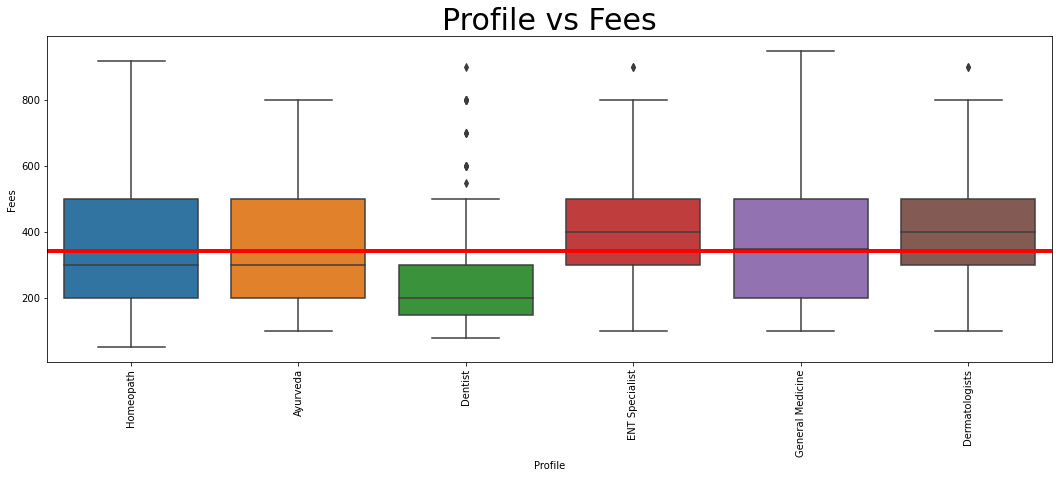

In [37]:
plt.figure(figsize=(18,6))
mean_fees=np.mean(Train_data['Fees'])
sn.boxplot(y='Fees',x='Profile',data=Train_data)
plt.axhline(mean_fees,linewidth=4,color='red',label='mean fees')
plt.title("Profile vs Fees",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

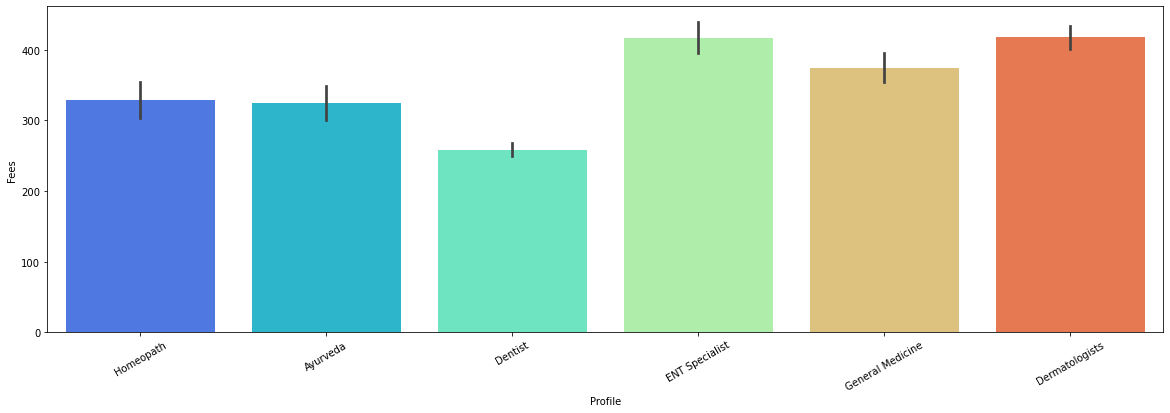

In [38]:
plt.figure(figsize=(20,6))
sn.barplot(y='Fees',x='Profile',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

In [39]:
Train_data.Rating.value_counts()

100%    654
98%     289
99%     258
97%     235
96%     216
95%     174
94%     111
93%      98
92%      65
90%      63
91%      58
88%      40
89%      40
85%      27
86%      21
82%      20
83%      20
80%      18
77%      15
87%      13
79%      12
84%      12
67%      12
81%      12
76%       9
73%       8
71%       8
75%       8
60%       7
74%       7
78%       6
68%       5
56%       5
69%       4
70%       3
72%       3
57%       2
55%       2
33%       2
63%       2
62%       2
64%       2
40%       1
65%       1
45%       1
53%       1
36%       1
47%       1
58%       1
7%        1
48%       1
Name: Rating, dtype: int64

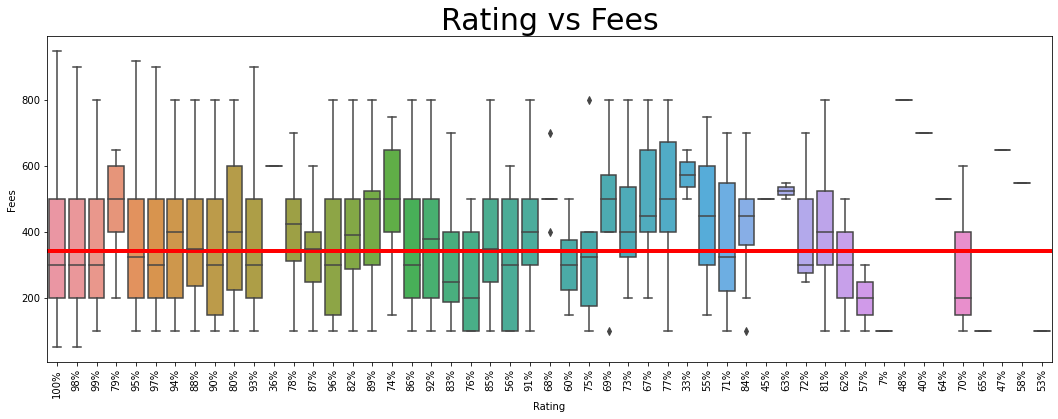

In [40]:
plt.figure(figsize=(18,6))
mean_fees=np.mean(Train_data['Fees'])
sn.boxplot(y='Fees',x='Rating',data=Train_data)
plt.axhline(mean_fees,linewidth=4,color='red',label='mean fees')
plt.title("Rating vs Fees",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

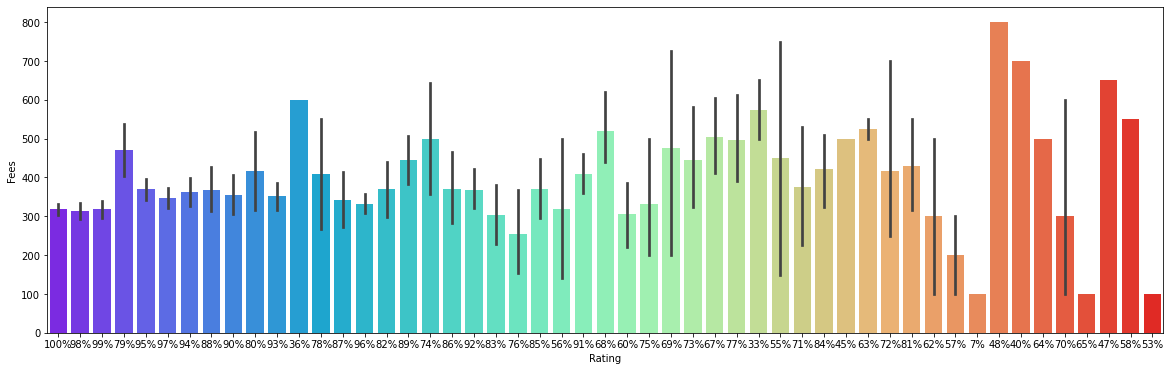

In [41]:
plt.figure(figsize=(20,6))
sn.barplot(y='Fees',x='Rating',data=Train_data,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

In [42]:
Train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [44]:
Experience=Train_data['Experience']
Experience=pd.get_dummies(Experience,drop_first=True)
Experience.head()

,10 years experience,11 years experience,12 years experience,13 years experience,14 years experience,15 years experience,16 years experience,17 years experience,18 years experience,19 years experience,...,50 years experience,51 years experience,52 years experience,53 years experience,56 years experience,58 years experience,6 years experience,7 years experience,8 years experience,9 years experience
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
Rating=Train_data['Rating']
Rating=pd.get_dummies(Rating,drop_first=True)
Rating.head()

,33%,36%,40%,45%,47%,48%,53%,55%,56%,57%,...,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
Place=Train_data['Place']
Place=pd.get_dummies(Place,drop_first=True)
Place.head()

,"AS Rao Nagar, Hyderabad","Abbigere, Bangalore","Abids, Hyderabad","Adambakkam, Chennai","Adugodi, Bangalore","Adyar, Chennai","Agaram, Chennai","Akshaya nagar, Bangalore","Alaknanda, Delhi","Aluva, Ernakulam",...,"West Marredpally, Hyderabad","West Of Chord Road, Bangalore","Whitefield, Bangalore","Wilson Garden, Bangalore","Worli, Mumbai","Yamuna Vihar, Delhi","Yelahanka New Town, Bangalore","Yelahanka, Bangalore","Yeshwanthpur, Bangalore","Yousufguda, Hyderabad"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
Profile=Train_data['Profile']
Profile=pd.get_dummies(Profile,drop_first=True)
Profile.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
4,0,0,0,0,0
7,1,0,0,0,0
12,1,0,0,0,0


In [48]:
Miscellaneous_Info=Train_data['Miscellaneous_Info']
Miscellaneous_Info=pd.get_dummies(Miscellaneous_Info,drop_first=True)
Miscellaneous_Info.head()

,"100% 1 Feedback Banashankari 3rd Stage, Bangalore","100% 1 Feedback Cunningham Road, Bangalore","100% 1 Feedback Ganapathy, Coimbatore","100% 1 Feedback Khar West, Mumbai","100% 1 Feedback Mahim, Mumbai","100% 1 Feedback Mulund West, Mumbai","100% 1 Feedback Nagarbhavi, Bangalore","100% 1 Feedback Poonamalle, Chennai","100% 1 Feedback Siddhapudur, Coimbatore","100% 1 Feedback T Nagar, Chennai",...,Zirconia Crowns Dental Implant Fixing Dental Sleep Medicine (Snoring and Sleep Apnea Management),Zirconia Crowns Dental Implant Fixing TMJ Therapy,Zirconia Crowns Oral Surgery Procedures Tooth Extraction,Zirconia Crowns Scaling / Polishing root canal treatment,dental implants RCT - Root Canal Treatment Crowns and Bridge,dental implants RCT - Root Canal Treatment Crowns and Bridges Fixing,endoscopic evaluation of nose microscopic evaluation of ears Nasal Endoscopy,o Acne Scarring surgery o Chemical peels and Skin complexion improvement treatments Microdermabrasion,premature ejaculation Treatment Of Erectile Dysfunction Male Sexual Problems,zoom bleaching RCT - Root Canal Treatment Pedodontics Children Dentistry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Train_data.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [50]:
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,200
12,"BDS, MDS",9 years experience,98%,"Coimbatore Racecourse, Coimbatore",Dentist,200


In [98]:
train=pd.concat([Train_data,Experience,Rating,Place,Profile],axis=1)

In [99]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Fees,10 years experience,11 years experience,12 years experience,13 years experience,...,"Yamuna Vihar, Delhi","Yelahanka New Town, Bangalore","Yelahanka, Bangalore","Yeshwanthpur, Bangalore","Yousufguda, Hyderabad",Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,200,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,"BDS, MDS",9 years experience,98%,"Coimbatore Racecourse, Coimbatore",Dentist,200,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
train.drop(['Experience','Rating','Place','Profile'],axis=1,inplace=True)
train.head()

,Qualification,Fees,10 years experience,11 years experience,12 years experience,13 years experience,14 years experience,15 years experience,16 years experience,17 years experience,...,"Yamuna Vihar, Delhi","Yelahanka New Town, Bangalore","Yelahanka, Bangalore","Yeshwanthpur, Bangalore","Yousufguda, Hyderabad",Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,"BHMS, MD - Homeopathy",100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",350,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,BDS,200,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,"BDS, MDS",200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [101]:
train.shape

(2577, 671)

In [102]:
Test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore"
7,"BDS, MDS - Pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...


In [103]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 2 to 1985
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       875 non-null    object
 1   Experience          875 non-null    object
 2   Rating              875 non-null    object
 3   Place               875 non-null    object
 4   Profile             875 non-null    object
 5   Miscellaneous_Info  875 non-null    object
dtypes: object(6)
memory usage: 87.9+ KB


In [104]:
Test_data.dropna(inplace=True)

In [105]:
Test_data.isnull().values.any()

False

In [106]:
Test_data.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

In [107]:
print("Experience")
print(Test_data["Experience"].value_counts())
Experience=pd.get_dummies(Experience,drop_first=True)
print()

print("Rating")
print(Test_data["Rating"].value_counts())
Rating=pd.get_dummies(Rating,drop_first=True)
print()

print("Place")
print(Test_data["Place"].value_counts())
Place=pd.get_dummies(Place,drop_first=True)
print()

print("Profile")
print(Test_data["Profile"].value_counts())
Profile=pd.get_dummies(Profile,drop_first=True)
print()


Experience
10 years experience    60
13 years experience    51
19 years experience    48
9 years experience     46
17 years experience    45
14 years experience    43
8 years experience     42
12 years experience    41
7 years experience     39
11 years experience    39
15 years experience    32
18 years experience    31
21 years experience    29
20 years experience    27
16 years experience    26
23 years experience    25
26 years experience    19
29 years experience    18
22 years experience    18
24 years experience    16
6 years experience     15
31 years experience    14
30 years experience    13
36 years experience    12
28 years experience    12
5 years experience     10
25 years experience    10
35 years experience     7
4 years experience      7
34 years experience     7
40 years experience     6
44 years experience     6
3 years experience      6
27 years experience     6
42 years experience     5
37 years experience     5
41 years experience     5
32 years experience     4
3

In [112]:

test=pd.concat([Test_data,Experience,Rating,Place,Profile],axis=1)

In [113]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,10 years experience,11 years experience,12 years experience,13 years experience,...,"Yamuna Vihar, Delhi","Yelahanka New Town, Bangalore","Yelahanka, Bangalore","Yeshwanthpur, Bangalore","Yousufguda, Hyderabad",Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
test.drop(['Experience','Rating','Place','Profile'],axis=1,inplace=True)
test.head()


,Qualification,Miscellaneous_Info,10 years experience,11 years experience,12 years experience,13 years experience,14 years experience,15 years experience,16 years experience,17 years experience,...,"Yamuna Vihar, Delhi","Yelahanka New Town, Bangalore","Yelahanka, Bangalore","Yeshwanthpur, Bangalore","Yousufguda, Hyderabad",Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"MBBS, DDVL","70% 4 Feedback KK Nagar, Chennai",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",General Dentistry Conservative Dentistry Cosme...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"BDS, MDS",Acrylic Partial Denture Impaction / Impacted T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
test.shape

(3074, 671)

In [116]:
from sklearn.preprocessing import LabelEncoder
for col in train.columns:
    if train[col].dtypes=='object':
        le=LabelEncoder()
        train[col]=le.fit_transform(train[col])

In [117]:
Train_data.describe()

,Fees
count,2577.000000
mean,343.440047
std,192.680230
min,50.000000
25%,200.000000
50%,300.000000
75%,500.000000
max,950.000000


In [118]:
Train_cor=Train_data.corr()
Train_cor

,Fees
Fees,1.0


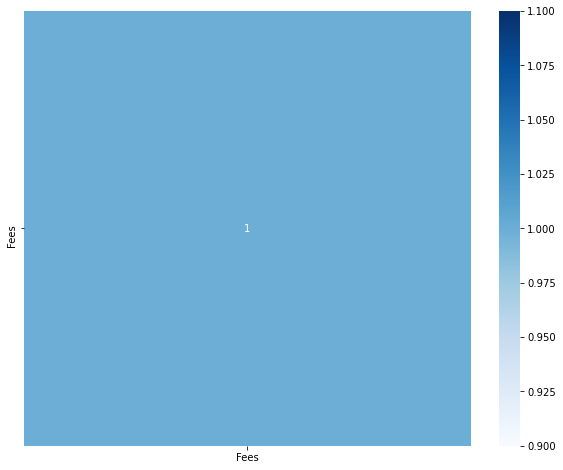

In [119]:
plt.figure(figsize=(10,8))
sn.heatmap(Train_data.corr(),cmap='Blues',annot=True)
plt.show()

In [123]:
from scipy.stats import zscore
z=np.abs(zscore(train))
z

array([[0.43108501, 1.26368592, 0.24595493, ..., 0.35954495, 0.41009474,
        3.07824784],
       [1.38429732, 0.03405241, 0.24595493, ..., 0.35954495, 0.41009474,
        0.32486013],
       [1.48975911, 0.48504292, 0.24595493, ..., 0.35954495, 0.41009474,
        0.32486013],
       ...,
       [0.04980009, 1.33179074, 0.24595493, ..., 0.35954495, 2.43846092,
        0.32486013],
       [0.8101191 , 1.26368592, 0.24595493, ..., 0.35954495, 2.43846092,
        0.32486013],
       [0.89755061, 0.74459059, 0.24595493, ..., 0.35954495, 0.41009474,
        0.32486013]])

In [124]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    0, ..., 2575, 2576, 2576], dtype=int64), array([ 17, 308, 670, ..., 648,   9, 501], dtype=int64))


In [125]:
train_new=train[(z<3).all(axis=1)]

In [126]:
print(train.shape,'\t\t', train_new.shape)

(2577, 671) 		 (0, 671)


In [127]:
train=train_new
train.shape

(0, 671)

In [128]:
train.shape

(0, 671)

In [129]:
train.columns

Index(['Qualification', 'Fees', '10 years experience', '11 years experience',
       '12 years experience', '13 years experience', '14 years experience',
       '15 years experience', '16 years experience', '17 years experience',
       ...
       'Yamuna Vihar, Delhi', 'Yelahanka New Town, Bangalore',
       'Yelahanka, Bangalore', 'Yeshwanthpur, Bangalore',
       'Yousufguda, Hyderabad', 'Dentist', 'Dermatologists', 'ENT Specialist',
       'General Medicine', 'Homeopath'],
      dtype='object', length=671)

In [130]:
x=train.drop(columns=['Fees'],axis=1)
x.head()


,Qualification,10 years experience,11 years experience,12 years experience,13 years experience,14 years experience,15 years experience,16 years experience,17 years experience,18 years experience,...,"Yamuna Vihar, Delhi","Yelahanka New Town, Bangalore","Yelahanka, Bangalore","Yeshwanthpur, Bangalore","Yousufguda, Hyderabad",Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath


In [131]:
y=train['Fees']
y.head()


Series([], Name: Fees, dtype: int64)

In [132]:
print(x.shape,'\t\t',y.shape)

(0, 670) 		 (0,)


In [133]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


ValueError: Found array with 0 sample(s) (shape=(0, 670)) while a minimum of 1 is required by StandardScaler.

In [ ]:
print(y_train.shape,'\t\t',y_test.shape)